## 1. Importing data and libraries

In [35]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go
import graphviz
import sklearn
from sklearn.preprocessing import StandardScaler

In [36]:
path = r'C:\Users\kshifera\Desktop\CF_Course\Specialization\Project\Data Sets'

In [37]:
#import dataframe
climate = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [38]:
#check
climate.tail()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
22945  20221027     10                  1               2.1            0.79   
22946  20221028     10                  6               2.1            0.77   
22947  20221029     10                  4               2.1            0.76   
22948  20221030     10                  5               2.1            0.80   
22949  20221031     10                  5               2.1            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
22945          1.0248                    1.34                 0.22   
22946          1.0244                    1.34                 0.22   
22947          1.0227                    1.34                 0.22   
22948          1.0212                    1.34                 0.22   
22949          1.0193                    1.34                 0.22   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
22945                 0             7.7  ...                     5   
22946                 0             5.4  ...                     5   
22947                 0             6.1  ...                     5   
22948                 0             5.8  ...                     5   
22949                 0             3.2  ...                     5   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
22945               0.82             1.0142                       1.13   
22946               0.82             1.0142                       1.13   
22947               0.82             1.0142                       1.13   
22948               0.82             1.0142                       1.13   
22949               0.82             1.0142                       1.13   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
22945                    0.41                    0                3.4   
22946                    0.41                    0                3.4   
22947                    0.41                    0                3.4   
22948                    0.41                    0                3.4   
22949                    0.41                    0                3.4   

       VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
22945                10.7                7.9               13.5  
22946                10.7                7.9               13.5  
22947                10.7                7.9               13.5  
22948                10.7                7.9               13.5  
22949                10.7                7.9               13.5  

[5 rows x 170 columns]

<Axes: >

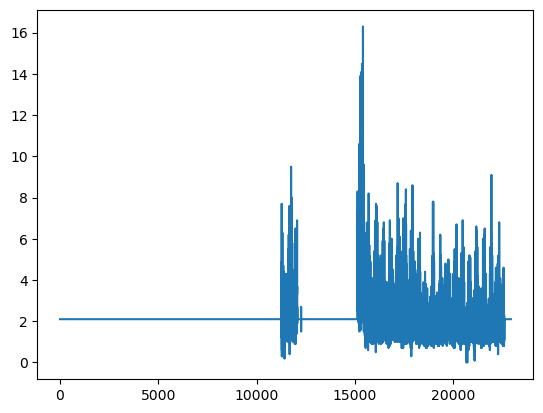

In [39]:
climate['BASEL_wind_speed'].plot()

In [40]:
#reduce to just mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
           'BELGRADE_temp_mean',
           'BUDAPEST_temp_mean',
           'DEBILT_temp_mean',
           'DUSSELDORF_temp_mean',
           'GDANSK_temp_mean',
           'HEATHROW_temp_mean',
           'KASSEL_temp_mean',
           'LJUBLJANA_temp_mean',
           'MAASTRICHT_temp_mean',
           'MADRID_temp_mean',
           'MUNCHENB_temp_mean',
           'OSLO_temp_mean',
           'ROMA_temp_mean',
           'SONNBLICK_temp_mean',
           'STOCKHOLM_temp_mean',
           'TOURS_temp_mean',
           'VALENTIA_temp_mean'
          ]].copy()

In [41]:
#check
df

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101      1              6.5                 3.7   
1      19600102      1              6.1                 2.9   
2      19600103      1              8.5                 3.1   
3      19600104      1              6.3                 2.0   
4      19600105      1              3.0                 2.0   
...         ...    ...              ...                 ...   
22945  20221027     10             15.9                18.2   
22946  20221028     10             16.7                15.9   
22947  20221029     10             16.7                13.4   
22948  20221030     10             15.4                15.0   
22949  20221031     10             13.5                14.4   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0                     2.4               9.3                  10.0   
1                     2.3               7.7                   8.2   
2                     2.7               6.8                   7.1   
3                     2.0               6.7                   6.8   
4                     2.5               8.0                   7.7   
...                   ...               ...                   ...   
22945                11.7              15.7                  17.8   
22946                11.7              16.0                  19.4   
22947                11.7              15.8                  18.2   
22948                11.7              14.4                  16.7   
22949                11.7              12.8                  15.2   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0                   0.8                10.6               7.9   
1                   1.6                 6.1               7.7   
2                   0.7                 8.4               6.5   
3                  -0.1                 9.4               5.8   
4                   0.4                 8.9               5.4   
...                 ...                 ...               ...   
22945              11.5                16.4               9.1   
22946              11.7                15.8               9.1   
22947              14.2                16.5               9.1   
22948              11.0                15.2               9.1   
22949               9.3                13.7               9.1   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                     -0.6                   9.5               7.6   
1                      2.1                   8.6               9.8   
2                      4.6                   6.9               8.6   
3                      3.2                   7.0              10.3   
4                      3.6                   8.1              12.1   
...                    ...                   ...               ...   
22945                 14.7                  18.6              20.0   
22946                 12.9                  18.9              19.1   
22947                 13.2                  18.2              19.0   
22948                 14.0                  16.3              15.7   
22949                 13.6                  15.3              14.1   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0                     6.9             4.9             7.8   
1                     6.2             3.4            12.2   
2                     5.8             1.9            10.2   
3                     3.9             3.0            10.8   
4                     1.8             3.7             9.9   
...                   ...             ...             ...   
22945                14.3             9.7            15.4   
22946                16.1            10.9            15.4   
22947                17.4             9.7            15.4   
22948                14.5             5.9            15.4   
22949                12.9             9.2            15.4   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0 

In [42]:
#Reduce the dataset to a single year
dfyear = df.loc[(df['DATE'] >= 19900101) & (df['DATE'] <19910101)]  #year 1990
dfyear

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
10958  19900101      1             -2.1                -1.3   
10959  19900102      1             -1.8                -0.9   
10960  19900103      1             -2.2                -0.8   
10961  19900104      1             -0.7                -3.1   
10962  19900105      1              0.0                -5.7   
...         ...    ...              ...                 ...   
11318  19901227     12              6.6                 3.8   
11319  19901228     12              3.8                 2.9   
11320  19901229     12             10.3                 1.3   
11321  19901230     12             12.0                 4.4   
11322  19901231     12              8.2                 6.2   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
10958                 0.1               0.5                   0.6   
10959                -0.4               1.0                   2.1   
10960                -0.5               1.8                   0.8   
10961                -2.0               0.3                   1.2   
10962                -2.6               3.3                   3.2   
...                   ...               ...                   ...   
11318                 0.7               6.3                   5.0   
11319                 1.8               4.9                   5.6   
11320                -0.7               8.5                   8.0   
11321                 1.0               6.2                   7.3   
11322                 2.7               4.5                   5.5   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
10958              -2.1                 4.5              -1.3   
10959              -0.4                 5.2              -0.7   
10960              -1.3                 4.0              -1.5   
10961              -3.8                 5.3              -1.5   
10962              -4.4                 6.6              -0.4   
...                 ...                 ...               ...   
11318               1.9                 5.8               3.5   
11319               1.6                 7.5               2.2   
11320               1.4                 7.5               6.0   
11321               2.9                 6.3               5.0   
11322               2.7                 6.8               2.9   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
10958                 -1.5                   0.5               7.7   
10959                 -1.9                   1.2               6.5   
10960                 -0.7                   0.9               7.0   
10961                 -1.8                  -0.8               6.5   
10962                 -4.1                   1.9               6.9   
...                    ...                   ...               ...   
11318                  1.0                   5.0               8.7   
11319                  1.7                   4.4               8.2   
11320                  1.8                   8.5               8.6   
11321                  4.1                   6.6               8.3   
11322                  2.9                   4.8               7.8   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
10958                -5.4            -6.7             3.9   
10959                -3.1            -5.9             6.1   
10960                -1.8            -7.6             5.9   
10961                -4.6            -2.0             6.0   
10962                -2.5            -0.8             4.2   
...                   ...             ...             ...   
11318                 5.1             1.0             8.0   
11319                 0.6            -0.2             7.9   
11320                 8.4             0.8             6.1   
11321                 7.1            -3.0             9.7   
11322                 5.3            -6.5            11.0   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
10

In [43]:
#drop the 'DATE' and 'MONTH' columns
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)
notempyear

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
10958             -2.1                -1.3                 0.1   
10959             -1.8                -0.9                -0.4   
10960             -2.2                -0.8                -0.5   
10961             -0.7                -3.1                -2.0   
10962              0.0                -5.7                -2.6   
...                ...                 ...                 ...   
11318              6.6                 3.8                 0.7   
11319              3.8                 2.9                 1.8   
11320             10.3                 1.3                -0.7   
11321             12.0                 4.4                 1.0   
11322              8.2                 6.2                 2.7   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
10958               0.5                   0.6              -2.1   
10959               1.0                   2.1              -0.4   
10960               1.8                   0.8              -1.3   
10961               0.3                   1.2              -3.8   
10962               3.3                   3.2              -4.4   
...                 ...                   ...               ...   
11318               6.3                   5.0               1.9   
11319               4.9                   5.6               1.6   
11320               8.5                   8.0               1.4   
11321               6.2                   7.3               2.9   
11322               4.5                   5.5               2.7   

       HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
10958                 4.5              -1.3                 -1.5   
10959                 5.2              -0.7                 -1.9   
10960                 4.0              -1.5                 -0.7   
10961                 5.3              -1.5                 -1.8   
10962                 6.6              -0.4                 -4.1   
...                   ...               ...                  ...   
11318                 5.8               3.5                  1.0   
11319                 7.5               2.2                  1.7   
11320                 7.5               6.0                  1.8   
11321                 6.3               5.0                  4.1   
11322                 6.8               2.9                  2.9   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
10958                   0.5               7.7                -5.4   
10959                   1.2               6.5                -3.1   
10960                   0.9               7.0                -1.8   
10961                  -0.8               6.5                -4.6   
10962                   1.9               6.9                -2.5   
...                     ...               ...                 ...   
11318                   5.0               8.7                 5.1   
11319                   4.4               8.2                 0.6   
11320                   8.5               8.6                 8.4   
11321                   6.6               8.3                 7.1   
11322                   4.8               7.8                 5.3   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
10958            -6.7             3.9                 -8.2   
10959            -5.9             6.1                -10.4   
10960            -7.6             5.9                -11.7   
10961            -2.0             6.0                -11.9   
10962            -0.8             4.2                -11.0   
...               ...             ...                  ...   
11318             1.0             8.0                -11.5   
11319            -0.2             7.9                -14.2   
11320             0.8             6.1                -10.0   
11321            -3.0             9.7                 -5.1   
11322            -6.5            11.0                 -5.9   

       STOCKHOLM_t

In [45]:
#scale
scaler = StandardScaler()
Scaled = pd.DataFrame(scaler.fit_transform(notempyear), columns = columns)
Scaled.head()

NameError: name 'column' is not defined

In [34]:
#Plot ALL weather data for all stations for year 1990

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=Scaled.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

NameError: name 'Scaled' is not defined

In [69]:
#create an index for the year 1990. Create a set of data from 1 to 365 
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [70]:
n_rows = dfyear.shape[0]
n_rows

365

### 2. Weather Station: Belgrade,  Year: 1990

In [105]:
#translate the weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=Scaled['BELGRADE_temp_mean'].to_numpy().reshape(n_rows,1) #< BELGRADE WEATHER STATION 

In [106]:
X.shape, y.shape

((365, 2), (365, 1))

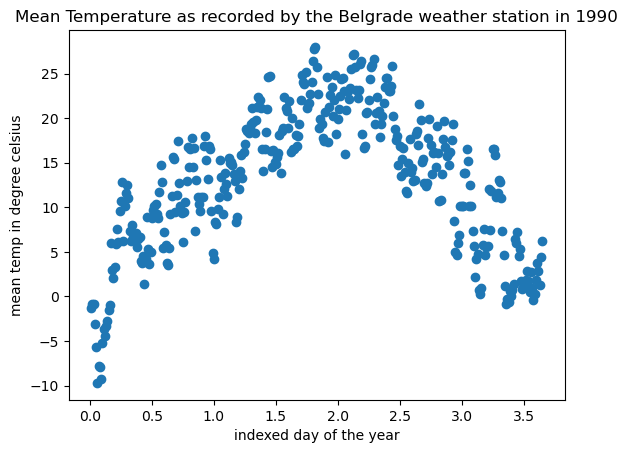

In [176]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['BELGRADE_temp_mean']) # BELGRADE WEATHER STATION 
plt.xlabel('indexed day of the year'); plt.ylabel('mean temp in degree celsius');
plt.title('Mean Temperature as recorded by the Belgrade weather station in 1990');
plt.show()

In [155]:
#what is the min temperature? 
dfyear['BELGRADE_temp_mean'].min()

-9.7

In [156]:
#what is the max temperature? 
dfyear['BELGRADE_temp_mean'].max()

28.0

In [225]:
#This computes the loss function for the gradiant descent. 

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [226]:
compute_cost(X,y)

array([0.5])

In [227]:
#This is the gradient descent function. 

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [228]:
%%time
#This runs the data through a gradient descent for the starting conditions in 'theta_init.'

num_iterations=1500 # 1500 iterations . 
theta_init=np.array([[1],[1]]) #guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #step size. 
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 844 ms
Wall time: 839 ms


In [229]:
theta

array([[-0.09463855],
       [ 0.05463273]])

In [230]:
#This will plot the loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#The loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();


In [231]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.77 s
Wall time: 1.77 s


In [232]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [233]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [234]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=1500 #<---start with the same iterations as above
theta_init=np.array([[0.1],[-0.3]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.01 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [235]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

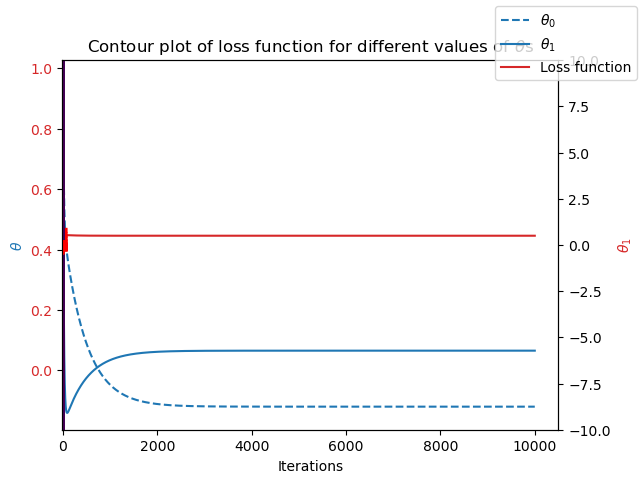

In [205]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

   #### The analysis result shows that the gradient descent has converged very well

### 3. Weather Station: Budapest, Year: 1995

In [268]:
#Reduce the dataset to a single year
dfyear2 = df.loc[(df['DATE'] >= 19950101) & (df['DATE'] <19960101)]  #year 1995
dfyear2

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
12784  19950101      1              2.6                 2.6   
12785  19950102      1             -0.5                 1.6   
12786  19950103      1             -1.5                -1.0   
12787  19950104      1             -5.0                -0.8   
12788  19950105      1             -6.6                -0.4   
...         ...    ...              ...                 ...   
13144  19951227     12             -2.0                 0.7   
13145  19951228     12             -4.2                -2.9   
13146  19951229     12             -4.0                -4.5   
13147  19951230     12             -1.9                -3.7   
13148  19951231     12              0.3                -0.1   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
12784                 2.6               2.0                   1.2   
12785                 2.3               3.0                   1.2   
12786                 0.8              -0.5                  -0.9   
12787                -0.9              -2.8                  -4.4   
12788                -0.1              -3.9                  -5.2   
...                   ...               ...                   ...   
13144                 1.1              -5.9                  -5.0   
13145                -3.2              -7.9                  -7.2   
13146                -6.7              -6.6                  -7.0   
13147                -5.0              -5.5                  -3.8   
13148                -4.0              -1.9                   1.0   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
12784               2.7                 1.4               0.6   
12785               0.1                 1.0              -0.4   
12786               1.5                 0.2              -3.1   
12787              -5.4                 1.2              -8.4   
12788              -7.8                 4.2              -8.8   
...                 ...                 ...               ...   
13144              -8.5                -1.5              -5.0   
13145             -11.5                -1.8              -8.2   
13146              -9.1                -0.8              -7.7   
13147             -10.9                -0.5              -6.1   
13148             -14.4                 1.5              -2.5   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
12784                  2.3                   0.9               8.1   
12785                 -0.3                   1.2               3.8   
12786                 -0.1                   0.2               2.2   
12787                 -1.5                  -3.5               3.5   
12788                 -1.6                  -4.8               7.8   
...                    ...                   ...               ...   
13144                 -0.7                  -4.7               8.2   
13145                 -4.2                  -6.5              10.3   
13146                 -5.9                  -5.8               8.7   
13147                 -6.1                  -4.7              11.0   
13148                 -4.1                   0.7               9.7   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
12784                 0.7            -3.1            11.0   
12785                -1.8            -3.3             6.5   
12786                -3.2            -8.2             4.3   
12787                -6.9            -7.1             3.0   
12788                -8.1            -0.8             2.4   
...                   ...             ...             ...   
13144                -4.6           -16.1            11.7   
13145                -7.7           -16.4             9.6   
13146                -8.6           -11.4             8.4   
13147                -6.0           -11.0             9.4   
13148                -5.6            -8.0            12.1   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
12

In [269]:
#drop the 'DATE' and 'MONTH' columns
notempyear2 = dfyear2.drop(['DATE','MONTH'], axis=1)
notempyear2

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
12784              2.6                 2.6                 2.6   
12785             -0.5                 1.6                 2.3   
12786             -1.5                -1.0                 0.8   
12787             -5.0                -0.8                -0.9   
12788             -6.6                -0.4                -0.1   
...                ...                 ...                 ...   
13144             -2.0                 0.7                 1.1   
13145             -4.2                -2.9                -3.2   
13146             -4.0                -4.5                -6.7   
13147             -1.9                -3.7                -5.0   
13148              0.3                -0.1                -4.0   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
12784               2.0                   1.2               2.7   
12785               3.0                   1.2               0.1   
12786              -0.5                  -0.9               1.5   
12787              -2.8                  -4.4              -5.4   
12788              -3.9                  -5.2              -7.8   
...                 ...                   ...               ...   
13144              -5.9                  -5.0              -8.5   
13145              -7.9                  -7.2             -11.5   
13146              -6.6                  -7.0              -9.1   
13147              -5.5                  -3.8             -10.9   
13148              -1.9                   1.0             -14.4   

       HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
12784                 1.4               0.6                  2.3   
12785                 1.0              -0.4                 -0.3   
12786                 0.2              -3.1                 -0.1   
12787                 1.2              -8.4                 -1.5   
12788                 4.2              -8.8                 -1.6   
...                   ...               ...                  ...   
13144                -1.5              -5.0                 -0.7   
13145                -1.8              -8.2                 -4.2   
13146                -0.8              -7.7                 -5.9   
13147                -0.5              -6.1                 -6.1   
13148                 1.5              -2.5                 -4.1   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
12784                   0.9               8.1                 0.7   
12785                   1.2               3.8                -1.8   
12786                   0.2               2.2                -3.2   
12787                  -3.5               3.5                -6.9   
12788                  -4.8               7.8                -8.1   
...                     ...               ...                 ...   
13144                  -4.7               8.2                -4.6   
13145                  -6.5              10.3                -7.7   
13146                  -5.8               8.7                -8.6   
13147                  -4.7              11.0                -6.0   
13148                   0.7               9.7                -5.6   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
12784            -3.1            11.0                -15.2   
12785            -3.3             6.5                -19.3   
12786            -8.2             4.3                -21.8   
12787            -7.1             3.0                -24.0   
12788            -0.8             2.4                -19.3   
...               ...             ...                  ...   
13144           -16.1            11.7                -13.2   
13145           -16.4             9.6                -18.6   
13146           -11.4             8.4                -17.7   
13147           -11.0             9.4                -11.5   
13148            -8.0            12.1                -10.0   

       STOCKHOLM_t

In [270]:
#scale
scaler = StandardScaler()
Scaled2 = pd.DataFrame(scaler.fit_transform(notempyear2), columns=columns)
Scaled2.head()
Scaled2.shape

(365, 18)

In [271]:
#create an index for the year 2000. Create a set of data from 1 to 366 
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index2 = pd.DataFrame(data = i, columns = ['index'])
index2

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [272]:
n_rows = dfyear2.shape[0]
n_rows

365

In [273]:
#translate the weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=Scaled2['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows,1) #< BUDAPEST WEATHER STATION 

In [274]:
X.shape, y.shape

((365, 2), (365, 1))

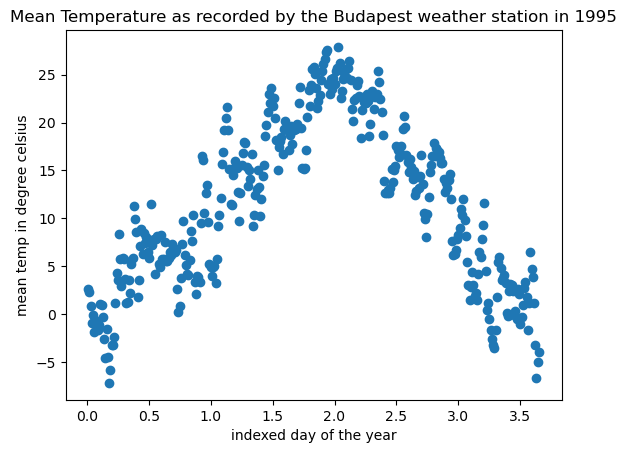

In [276]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear2['BUDAPEST_temp_mean']) # BUDAPEST WEATHER STATION 
plt.xlabel('indexed day of the year'); plt.ylabel('mean temp in degree celsius');
plt.title('Mean Temperature as recorded by the Budapest weather station in 1995');
plt.show()

In [299]:
#what is the min temperature? 
dfyear2['BUDAPEST_temp_mean'].min()

-7.2

In [300]:
#what is the min temperature? 
dfyear2['BUDAPEST_temp_mean'].max()

27.9

In [279]:
#This computes the loss function for the gradiant descent. 

def compute_cost2(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [280]:
compute_cost2(X,y)

array([0.5])

In [281]:
#This is the gradient descent function. 

def gradient_descent2(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [282]:
%%time
#This runs the data through a gradient descent for the starting conditions in 'theta_init.'

num_iterations=1500 # 10000 iterations . 
theta_init=np.array([[1],[1]]) #guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #step size. 
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent2(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 812 ms
Wall time: 809 ms


In [283]:
theta

array([[-0.1392009 ],
       [ 0.07921786]])

In [284]:
#This will plot the loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#The loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();


In [285]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost2(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.84 s
Wall time: 1.86 s


In [286]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [287]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [288]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=1500 #<---start with the same iterations as above
theta_init=np.array([[-0.1],[-0.3]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.01 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [289]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

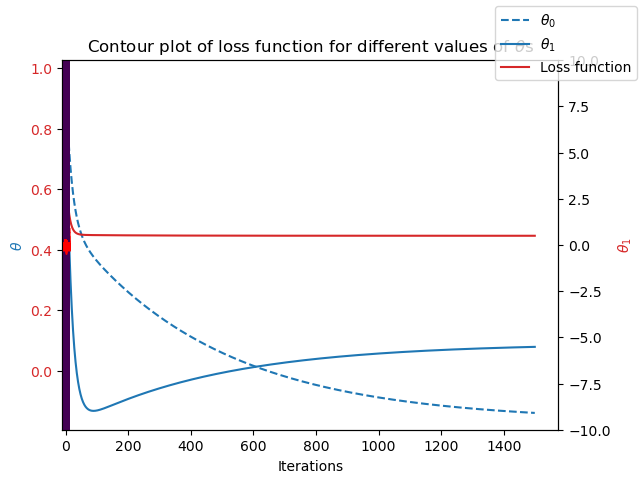

In [290]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

### 4. Weather Station: Roma, Year: 1999

In [292]:
#Reduce the dataset to a single year
dfyear3 = df.loc[(df['DATE'] >= 19990101) & (df['DATE'] <20000101)]  #year 1999
dfyear3

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
14245  19990101      1              0.3                 0.1   
14246  19990102      1              2.8                 3.8   
14247  19990103      1              7.8                 3.6   
14248  19990104      1              9.2                 1.4   
14249  19990105      1              9.7                 4.5   
...         ...    ...              ...                 ...   
14605  19991227     12              5.0                 4.1   
14606  19991228     12              2.4                 4.7   
14607  19991229     12              1.8                 2.0   
14608  19991230     12              1.1                 0.3   
14609  19991231     12              0.7                -0.5   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
14245                -3.1               5.8                   5.6   
14246                -1.2               6.4                   6.2   
14247                 2.9               5.6                   5.9   
14248                 3.9              10.1                  10.5   
14249                 2.3              11.5                  12.2   
...                   ...               ...                   ...   
14605                 4.0               3.8                   3.1   
14606                 0.6               1.5                   2.6   
14607                 1.6               3.2                   2.8   
14608                 1.8               2.9                   3.4   
14609                -1.6               3.9                   4.1   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
14245              -1.8                 9.2               0.6   
14246              -3.8                 8.3               2.4   
14247              -1.7                 8.8               4.4   
14248              -0.7                 9.9               8.1   
14249               6.3                12.4              10.4   
...                 ...                 ...               ...   
14605              -0.9                 3.2               1.5   
14606               0.5                 3.4               1.5   
14607              -2.2                 2.0               2.1   
14608              -1.2                 3.4               1.2   
14609              -1.3                 6.0               1.4   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
14245                  0.1                   7.8               5.0   
14246                  1.1                   7.2               3.6   
14247                  2.5                   6.0               4.4   
14248                  2.4                  10.6               3.8   
14249                  0.5                  12.5               8.0   
...                    ...                   ...               ...   
14605                  2.8                   3.2              11.4   
14606                  0.9                   2.3               7.6   
14607                 -2.0                   2.3               3.4   
14608                 -3.5                   2.5               3.3   
14609                 -5.3                   3.6               3.4   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
14245                -0.4             0.3            11.5   
14246                 1.1             0.5            11.5   
14247                 7.0             2.3             9.1   
14248                 8.8             1.8             8.7   
14249                 7.4             0.4             9.2   
...                   ...             ...             ...   
14605                 2.2             0.7            13.6   
14606                -0.1            -0.8            10.9   
14607                -0.4            -3.5             4.9   
14608                -0.6            -9.4            15.4   
14609                -0.6           -10.7             4.3   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
14

In [293]:
#drop the 'DATE' and 'MONTH' columns
notempyear3 = dfyear3.drop(['DATE','MONTH'], axis=1)
notempyear3

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
14245              0.3                 0.1                -3.1   
14246              2.8                 3.8                -1.2   
14247              7.8                 3.6                 2.9   
14248              9.2                 1.4                 3.9   
14249              9.7                 4.5                 2.3   
...                ...                 ...                 ...   
14605              5.0                 4.1                 4.0   
14606              2.4                 4.7                 0.6   
14607              1.8                 2.0                 1.6   
14608              1.1                 0.3                 1.8   
14609              0.7                -0.5                -1.6   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
14245               5.8                   5.6              -1.8   
14246               6.4                   6.2              -3.8   
14247               5.6                   5.9              -1.7   
14248              10.1                  10.5              -0.7   
14249              11.5                  12.2               6.3   
...                 ...                   ...               ...   
14605               3.8                   3.1              -0.9   
14606               1.5                   2.6               0.5   
14607               3.2                   2.8              -2.2   
14608               2.9                   3.4              -1.2   
14609               3.9                   4.1              -1.3   

       HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
14245                 9.2               0.6                  0.1   
14246                 8.3               2.4                  1.1   
14247                 8.8               4.4                  2.5   
14248                 9.9               8.1                  2.4   
14249                12.4              10.4                  0.5   
...                   ...               ...                  ...   
14605                 3.2               1.5                  2.8   
14606                 3.4               1.5                  0.9   
14607                 2.0               2.1                 -2.0   
14608                 3.4               1.2                 -3.5   
14609                 6.0               1.4                 -5.3   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
14245                   7.8               5.0                -0.4   
14246                   7.2               3.6                 1.1   
14247                   6.0               4.4                 7.0   
14248                  10.6               3.8                 8.8   
14249                  12.5               8.0                 7.4   
...                     ...               ...                 ...   
14605                   3.2              11.4                 2.2   
14606                   2.3               7.6                -0.1   
14607                   2.3               3.4                -0.4   
14608                   2.5               3.3                -0.6   
14609                   3.6               3.4                -0.6   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
14245             0.3            11.5                -10.0   
14246             0.5            11.5                 -8.7   
14247             2.3             9.1                 -9.4   
14248             1.8             8.7                 -7.8   
14249             0.4             9.2                 -2.8   
...               ...             ...                  ...   
14605             0.7            13.6                -14.3   
14606            -0.8            10.9                -14.9   
14607            -3.5             4.9                -18.2   
14608            -9.4            15.4                -18.8   
14609           -10.7             4.3                -17.9   

       STOCKHOLM_t

In [294]:
#scale
scaler = StandardScaler()
Scaled3 = pd.DataFrame(scaler.fit_transform(notempyear3), columns=columns)
Scaled3.head()
Scaled3.shape

(365, 18)

In [295]:
#create an index for the year 2000. Create a set of data from 1 to 366 
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index3 = pd.DataFrame(data = i, columns = ['index'])
index3

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [296]:
#translate the weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=Scaled3['ROMA_temp_mean'].to_numpy().reshape(n_rows,1) #< ROMA WEATHER STATION 

In [297]:
X.shape, y.shape

((365, 2), (365, 1))

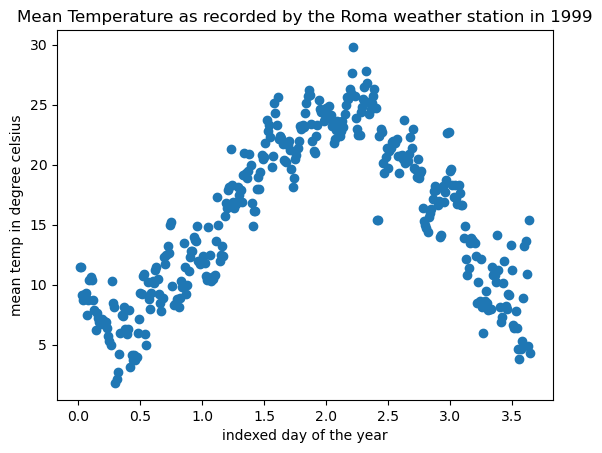

In [298]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear3['ROMA_temp_mean']) # ROMA WEATHER STATION 
plt.xlabel('indexed day of the year'); plt.ylabel('mean temp in degree celsius');
plt.title('Mean Temperature as recorded by the Roma weather station in 1999');
plt.show()

In [301]:
#what is the min temperature? 
dfyear3['ROMA_temp_mean'].min()

1.8

In [303]:
#what is the min temperature? 
dfyear3['ROMA_temp_mean'].max()

29.8

In [304]:
#This computes the loss function for the gradiant descent. 

def compute_cost3(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [305]:
compute_cost3(X,y)

array([0.5])

In [306]:
#This is the gradient descent function. 

def gradient_descent3(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [307]:
%%time
#This runs the data through a gradient descent for the starting conditions in 'theta_init.'

num_iterations=1500 # 10000 iterations . 
theta_init=np.array([[1],[1]]) #guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #step size. 
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent2(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 812 ms
Wall time: 819 ms


In [308]:
theta

array([[-0.47648903],
       [ 0.26530038]])

In [309]:
#This will plot the loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#The loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();


In [310]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost2(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2 s
Wall time: 1.99 s


In [311]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [345]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [315]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=1500 #<---start with the same iterations as above
theta_init=np.array([[-0.3],[-0.5]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.01 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [316]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

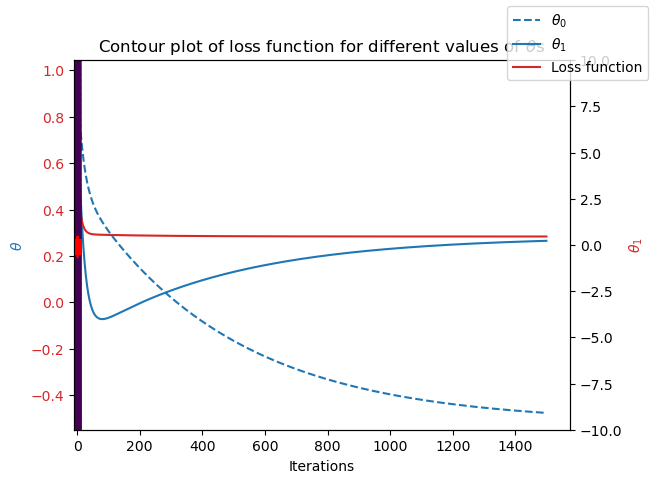

In [317]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

### 5. Observations of the past 60 years

In [320]:
#Reduce the dataset to the past 60 years
dfyear4 = df.loc[(df['DATE'] >= 19630101) ]  
dfyear4

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
1096   19630101      1              0.3                 0.2   
1097   19630102      1             -1.2                -0.9   
1098   19630103      1             -0.2                 0.5   
1099   19630104      1              2.5                 3.3   
1100   19630105      1              4.4                10.1   
...         ...    ...              ...                 ...   
22945  20221027     10             15.9                18.2   
22946  20221028     10             16.7                15.9   
22947  20221029     10             16.7                13.4   
22948  20221030     10             15.4                15.0   
22949  20221031     10             13.5                14.4   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
1096                 -2.0              -8.3                  -5.1   
1097                 -1.6              -8.6                  -2.1   
1098                 -0.5              -4.1                  -0.2   
1099                  1.6              -0.5                   2.1   
1100                  1.3               1.1                   1.7   
...                   ...               ...                   ...   
22945                11.7              15.7                  17.8   
22946                11.7              16.0                  19.4   
22947                11.7              15.8                  18.2   
22948                11.7              14.4                  16.7   
22949                11.7              12.8                  15.2   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
1096              -18.0                -0.6              -9.4   
1097              -13.5                -1.0              -8.6   
1098               -8.0                -0.5              -4.0   
1099               -4.4                 0.8              -0.7   
1100               -1.5                 0.8               2.4   
...                 ...                 ...               ...   
22945              11.5                16.4               9.1   
22946              11.7                15.8               9.1   
22947              14.2                16.5               9.1   
22948              11.0                15.2               9.1   
22949               9.3                13.7               9.1   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
1096                  -0.2                  -4.6               8.7   
1097                  -0.2                  -3.5               8.3   
1098                   0.8                  -0.6               5.1   
1099                   1.5                   2.0               3.7   
1100                   1.8                   1.1               7.4   
...                    ...                   ...               ...   
22945                 14.7                  18.6              20.0   
22946                 12.9                  18.9              19.1   
22947                 13.2                  18.2              19.0   
22948                 14.0                  16.3              15.7   
22949                 13.6                  15.3              14.1   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
1096                 -3.8            -4.7            11.6   
1097                 -3.2           -13.7            11.6   
1098                 -2.6           -12.6            12.4   
1099                  2.0            -8.8            10.2   
1100                  1.6           -11.8            10.1   
...                   ...             ...             ...   
22945                14.3             9.7            15.4   
22946                16.1            10.9            15.4   
22947                17.4             9.7            15.4   
22948                14.5             5.9            15.4   
22949                12.9             9.2            15.4   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
10

In [321]:
#drop the 'DATE' and 'MONTH' columns
notempyear4 = dfyear4.drop(['DATE','MONTH'], axis=1)
notempyear4

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
1096               0.3                 0.2                -2.0   
1097              -1.2                -0.9                -1.6   
1098              -0.2                 0.5                -0.5   
1099               2.5                 3.3                 1.6   
1100               4.4                10.1                 1.3   
...                ...                 ...                 ...   
22945             15.9                18.2                11.7   
22946             16.7                15.9                11.7   
22947             16.7                13.4                11.7   
22948             15.4                15.0                11.7   
22949             13.5                14.4                11.7   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
1096               -8.3                  -5.1             -18.0   
1097               -8.6                  -2.1             -13.5   
1098               -4.1                  -0.2              -8.0   
1099               -0.5                   2.1              -4.4   
1100                1.1                   1.7              -1.5   
...                 ...                   ...               ...   
22945              15.7                  17.8              11.5   
22946              16.0                  19.4              11.7   
22947              15.8                  18.2              14.2   
22948              14.4                  16.7              11.0   
22949              12.8                  15.2               9.3   

       HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
1096                 -0.6              -9.4                 -0.2   
1097                 -1.0              -8.6                 -0.2   
1098                 -0.5              -4.0                  0.8   
1099                  0.8              -0.7                  1.5   
1100                  0.8               2.4                  1.8   
...                   ...               ...                  ...   
22945                16.4               9.1                 14.7   
22946                15.8               9.1                 12.9   
22947                16.5               9.1                 13.2   
22948                15.2               9.1                 14.0   
22949                13.7               9.1                 13.6   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
1096                   -4.6               8.7                -3.8   
1097                   -3.5               8.3                -3.2   
1098                   -0.6               5.1                -2.6   
1099                    2.0               3.7                 2.0   
1100                    1.1               7.4                 1.6   
...                     ...               ...                 ...   
22945                  18.6              20.0                14.3   
22946                  18.9              19.1                16.1   
22947                  18.2              19.0                17.4   
22948                  16.3              15.7                14.5   
22949                  15.3              14.1                12.9   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
1096             -4.7            11.6                 -9.5   
1097            -13.7            11.6                -10.3   
1098            -12.6            12.4                 -9.2   
1099             -8.8            10.2                -11.6   
1100            -11.8            10.1                -12.8   
...               ...             ...                  ...   
22945             9.7            15.4                  0.6   
22946            10.9            15.4                  2.3   
22947             9.7            15.4                  3.3   
22948             5.9            15.4                  3.4   
22949             9.2            15.4                  1.7   

       STOCKHOLM_t

In [322]:
#scale
scaler = StandardScaler()
Scaled4 = pd.DataFrame(scaler.fit_transform(notempyear4), columns=columns)
Scaled4.head()
Scaled4.shape

(21854, 18)

In [324]:
#create an index. Create a set of data from 1 to 21854 
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 21854 = 21.854
i = np.arange(0.001,21.855,0.001) #<---needs to be one GREATER than the total number of days
index4 = pd.DataFrame(data = i, columns = ['index'])
index4

index
0       0.001
1       0.002
2       0.003
3       0.004
4       0.005
...       ...
21849  21.850
21850  21.851
21851  21.852
21852  21.853
21853  21.854

[21854 rows x 1 columns]

In [330]:
n_rows4 = dfyear4.shape[0]
n_rows4

21854

In [335]:
#translate the weather data into the X and y datasets needed for the optimization function.

X=index4.to_numpy().reshape(n_rows4,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows4,1))
X = np.concatenate((ones, X), axis=1)
y=Scaled4['ROMA_temp_mean'].to_numpy().reshape(n_rows4,1) 

In [336]:
X.shape, y.shape

((21854, 2), (21854, 1))

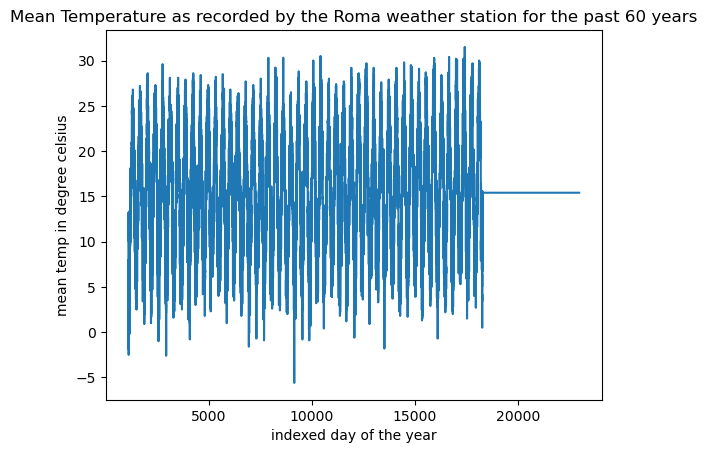

In [341]:
#Look at one year of temperature data over time

plt.plot(dfyear4['ROMA_temp_mean'], linestyle = 'solid')
plt.xlabel('indexed day of the year'); plt.ylabel('mean temp in degree celsius');
plt.title('Mean Temperature as recorded by the Roma weather station for the past 60 years');
plt.show()

In [344]:
#temperature characteristics  
dfyear4['ROMA_temp_mean'].describe()

count    21854.000000
mean        15.399707
std          5.911843
min         -5.600000
25%         11.200000
50%         15.400000
75%         19.600000
max         31.500000
Name: ROMA_temp_mean, dtype: float64